In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [2]:
insurance_data = pd.read_csv('insurance.csv')

In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_data.shape

(1338, 7)

In [5]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

/Users/skirwai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


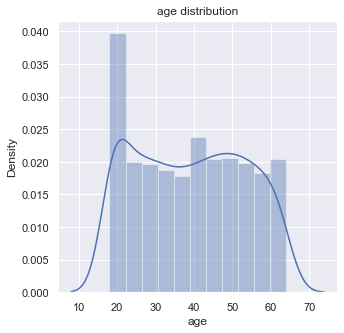

In [18]:
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(insurance_data['age'])
plt.title('age distribution')
plt.show()

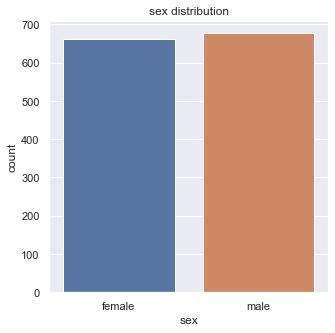

In [19]:
# for categorical values,, gender column

plt.figure(figsize=(5,5))
sns.countplot(x='sex', data=insurance_data)
plt.title('sex distribution')
plt.show()

/Users/skirwai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


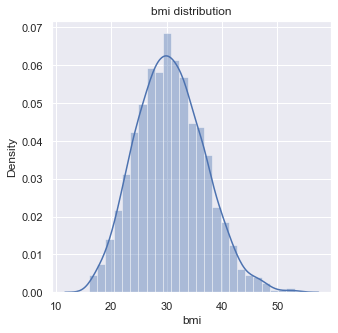

In [20]:
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(insurance_data['bmi'])
plt.title('bmi distribution')
plt.show()

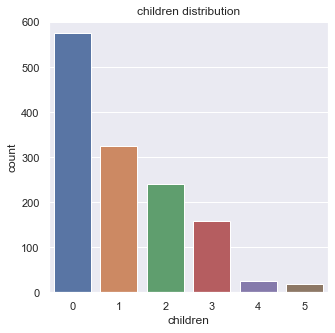

In [21]:
plt.figure(figsize=(5,5))
sns.countplot(x='children', data=insurance_data)
plt.title('children distribution')
plt.show()

In [22]:
insurance_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

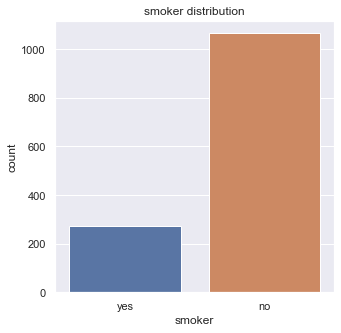

In [23]:
# for categorical values,, gender column

plt.figure(figsize=(5,5))
sns.countplot(x='smoker', data=insurance_data)
plt.title('smoker distribution')
plt.show()

In [24]:
insurance_data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

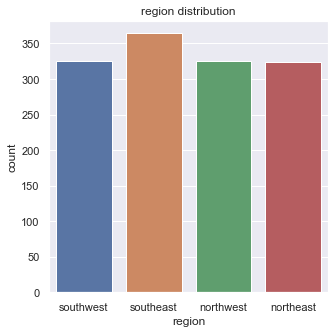

In [25]:
# for categorical values,, gender column

plt.figure(figsize=(5,5))
sns.countplot(x='region', data=insurance_data)
plt.title('region distribution')
plt.show()

In [26]:
insurance_data['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

/Users/skirwai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


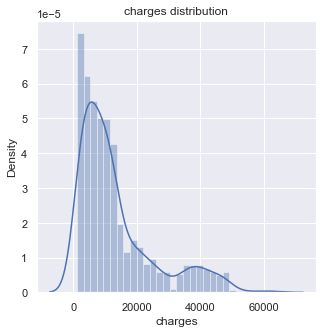

In [27]:
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(insurance_data['charges'])
plt.title('charges distribution')
plt.show()

In [28]:
# convert categorical column to numerical values
insurance_data.replace({'smoker':{'no':0, 'yes':1},
                     'region':{'southeast':0, 'northwest':1,'southwest':2,
                              'northeast':3},
                     'sex':{'male':0, 'female':1}},
                     inplace=True)

In [31]:
X = insurance_data.drop(['charges'], axis=1)
Y = insurance_data['charges']

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=2,
                                                   test_size=0.25)

In [33]:
print(X.shape,X_train.shape, X_test.shape)

print(Y.shape,Y_train.shape, Y_test.shape)

(1338, 6) (1003, 6) (335, 6)
(1338,) (1003,) (335,)


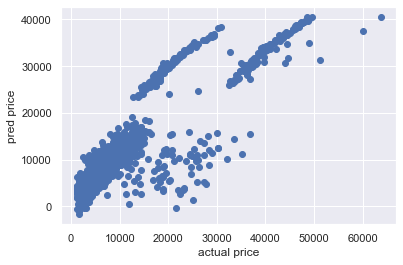

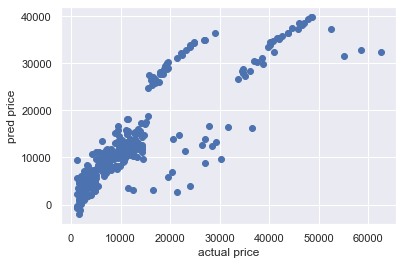

In [34]:
# Linear Regression model
lin_reg = LinearRegression()

lin_reg.fit(X_train,Y_train)

pred_train = lin_reg.predict(X_train)

error_score_1= metrics.r2_score(pred_train, Y_train)
error_score_1

# Mean absolute error
score_2 = metrics.mean_absolute_error(Y_train, pred_train)

# visual predicted prices
plt.scatter(Y_train, pred_train)
plt.xlabel('actual price')
plt.ylabel('pred price')
plt.show()

pred_test = lin_reg.predict(X_test)

error_score_test_1= metrics.r2_score(pred_test, Y_test)
error_score_test_1


# Mean absolute error
test_score_2 = metrics.mean_absolute_error(Y_test, pred_test)


# visual predicted prices
plt.scatter(Y_test, pred_test)
plt.xlabel('actual price')
plt.ylabel('pred price')
plt.show()


In [35]:


print(' for traindata : R squre', error_score_1)
print('for traindata : MAE', score_2)

print(' for traindata : R squre', error_score_test_1)
print('for traindata : MAE', test_score_2)


 for traindata : R squre 0.6661888873108305
for traindata : MAE 4195.259660775228
 for traindata : R squre 0.6486502473942337
for traindata : MAE 4168.159971599377


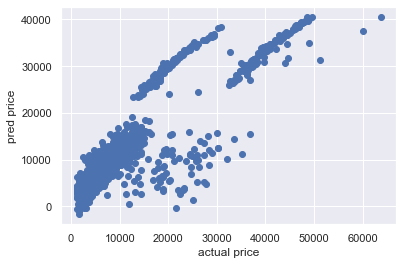

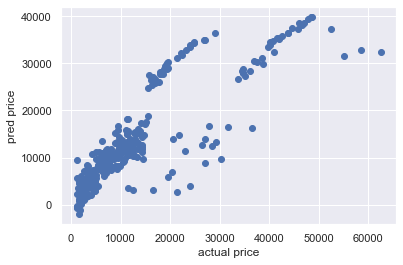

In [36]:

# Lasso Regression
lass_reg = Lasso()
lass_reg.fit(X_train, Y_train)

pred_train = lass_reg.predict(X_train)

error_score_1= metrics.r2_score(pred_train, Y_train)
error_score_1

# Mean absolute error
score_2 = metrics.mean_absolute_error(Y_train, pred_train)


# visual predicted prices
plt.scatter(Y_train, pred_train)
plt.xlabel('actual price')
plt.ylabel('pred price')
plt.show()

pred_test = lass_reg.predict(X_test)

error_score_test_1= metrics.r2_score(pred_test, Y_test)
error_score_test_1


# Mean absolute error
test_score_2 = metrics.mean_absolute_error(Y_test, pred_test)



# visual predicted prices
plt.scatter(Y_test, pred_test)
plt.xlabel('actual price')
plt.ylabel('pred price')
plt.show()



In [38]:
print(' for traindata : R squre', error_score_1)
print('for traindata : MAE', score_2)

print(' for testdata : R squre', error_score_test_1)
print('for testdata : MAE', test_score_2)

 for traindata : R squre 0.6660332281567372
for traindata : MAE 4195.717640928109
 for testdata : R squre 0.6484916381612911
for testdata : MAE 4168.276277147194


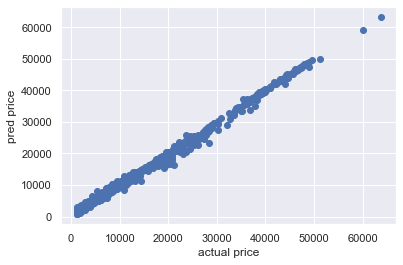

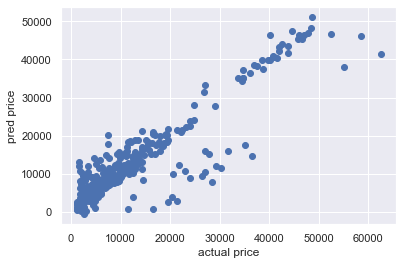

NameError: name 'error_score_test' is not defined

In [39]:
from xgboost import XGBRegressor

#loading model
model = XGBRegressor()

model.fit(X_train, Y_train)


pred_train = model.predict(X_train)

error_score_1= metrics.r2_score(pred_train, Y_train)
error_score_1

# Mean absolute error
score_2 = metrics.mean_absolute_error(Y_train, pred_train)

# visual predicted prices
plt.scatter(Y_train, pred_train)
plt.xlabel('actual price')
plt.ylabel('pred price')
plt.show()

pred_test = model.predict(X_test)

error_score_test_1= metrics.r2_score(pred_test, Y_test)
error_score_test_1


# Mean absolute error
test_score_2 = metrics.mean_absolute_error(Y_test, pred_test)



# visual predicted prices
plt.scatter(Y_test, pred_test)
plt.xlabel('actual price')
plt.ylabel('pred price')
plt.show()


In [40]:
print(' for traindata : R squre', error_score_1)
print('for traindata : MAE', score_2)

print(' for testdata : R squre', error_score_test_1)
print('for testdata : MAE', test_score_2)

 for traindata : R squre 0.9959151262965709
for traindata : MAE 461.07433447031565
 for testdata : R squre 0.7976436359713818
for testdata : MAE 2923.51382315179


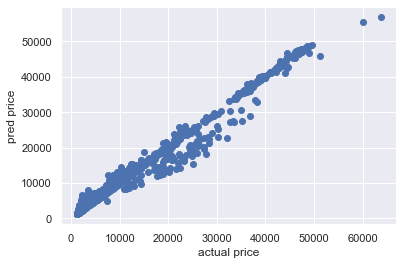

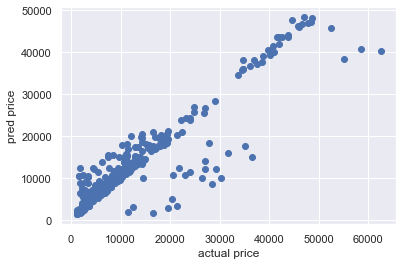

In [41]:


#loading model
reg_model = RandomForestRegressor(n_estimators=100)

reg_model.fit(X_train, Y_train)


pred_train = reg_model.predict(X_train)

error_score_1= metrics.r2_score(pred_train, Y_train)
error_score_1

# Mean absolute error
score_2 = metrics.mean_absolute_error(Y_train, pred_train)

# visual predicted prices
plt.scatter(Y_train, pred_train)
plt.xlabel('actual price')
plt.ylabel('pred price')
plt.show()

pred_test = reg_model.predict(X_test)

error_score_test_1= metrics.r2_score(pred_test, Y_test)
error_score_test_1


# Mean absolute error
test_score_2 = metrics.mean_absolute_error(Y_test, pred_test)


# visual predicted prices
plt.scatter(Y_test, pred_test)
plt.xlabel('actual price')
plt.ylabel('pred price')
plt.show()


In [42]:
print(' for traindata : R squre', error_score_1)
print('for traindata : MAE', score_2)

print(' for testdata : R squre', error_score_test_1)
print('for testdata : MAE', test_score_2)

 for traindata : R squre 0.9750425790659432
for traindata : MAE 999.269140541346
 for testdata : R squre 0.8110715704439326
for testdata : MAE 2547.6411417231934


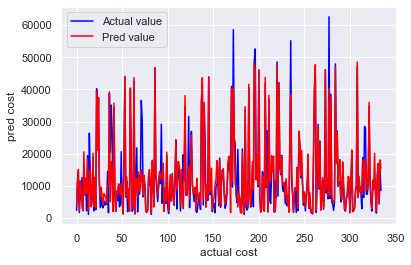

In [43]:
plt.plot(list(Y_test), color='blue', label='Actual value')
plt.plot(pred_test, color='red', label='Pred value')
plt.xlabel('actual cost')
plt.ylabel('pred cost')
plt.legend()

In [46]:
# Building predicting system
import numpy as np
input_data = (32,1,28.88,0,0,1)

# changing input to numpy array
input_data_np = np.asarray(input_data)
input_data_np

array([32.  ,  1.  , 28.88,  0.  ,  0.  ,  1.  ])

In [47]:
# reshape the array
input_data_reshape = input_data_np.reshape(1,-1)
input_data_reshape

array([[32.  ,  1.  , 28.88,  0.  ,  0.  ,  1.  ]])

In [48]:
print(input_data_np.reshape(-1,1))

[[32.  ]
 [ 1.  ]
 [28.88]
 [ 0.  ]
 [ 0.  ]
 [ 1.  ]]


In [49]:
pred_test_1 = reg_model.predict(input_data_reshape)
pred_test_1[0]

4070.3048755000013